<a href="https://colab.research.google.com/github/baharababah/Botnet-Attack-Detection-Using-Machine-Learning/blob/main/Linear_Regression_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# --------------------------------------------------------------
# Simple Linear Regression
# Predict the marks obtained by a student based on hours of study
# --------------------------------------------------------------
from google.colab import drive 
drive.mount('/content/drive/')
# ----------------------------------------------
# Step 0 - Import Libraries
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets
# ----------------------------------------------
# Step 1 - Read the data
# ----------------------------------------------
houses = pd.read_csv('/content/drive/My Drive/kc_house_data.csv')
houses.head(10)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [17]:
houses.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [18]:
houses_prep = houses.copy()
houses_prep = houses_prep.drop(['date', 'id'], axis=1)
houses_prep.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d43a79b0>]],
      dtype=object)

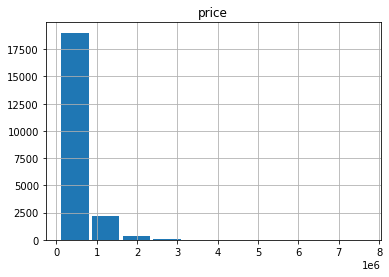

In [19]:
# Create pandas histogram to check if the columns are normal distribution
# price variable is not normaly distribution
houses_prep.hist(column= 'price', rwidth = 0.9)


The histogram shows that price variable is not Normally Distributed

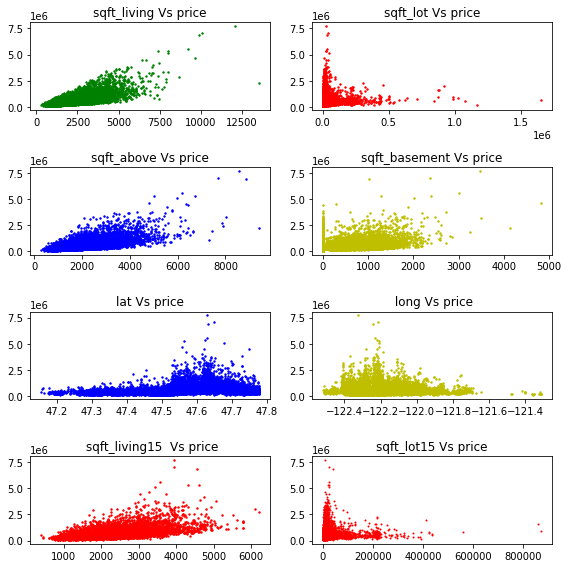

In [20]:
# ----------------------------------------------
# Step 3 - Data Visualisation
# ----------------------------------------------
#price            float64
# Visualise the continuous features Vs demand
# sqft_living , sqft_lot, sqft_above , sqft_basement , lat , long  , sqft_living15 , sqft_lot15 
fig = plt.figure(figsize=(8, 8))
plt.subplot(4,2,1) 
plt.title('sqft_living Vs price')
plt.scatter(houses_prep['sqft_living'], houses_prep['price'], s=2, c='g')
plt.tight_layout()

plt.subplot(4,2,2) 
plt.title('sqft_lot Vs price')
plt.scatter(houses_prep['sqft_lot'], houses_prep['price'], s=2, c='r')
plt.tight_layout()


plt.subplot(4,2,3) 
plt.title('sqft_above Vs price')
plt.scatter(houses_prep['sqft_above'], houses_prep['price'], s=2, c='b')
plt.tight_layout()

plt.subplot(4,2,4) 
plt.title('sqft_basement Vs price')
plt.scatter(houses_prep['sqft_basement'], houses_prep['price'], s=2, c='y')
plt.tight_layout()

plt.subplot(4,2,5) 
plt.title('lat Vs price')
plt.scatter(houses_prep['lat'], houses_prep['price'], s=2, c='b')
plt.tight_layout()

plt.subplot(4,2,6) 
plt.title(' long Vs price')
plt.scatter(houses_prep['long'], houses_prep['price'], s=2, c='y')
plt.tight_layout()

plt.subplot(4,2,7) 
plt.title(' sqft_living15  Vs price')
plt.scatter(houses_prep['sqft_living15'], houses_prep['price'], s=2, c='r')
plt.tight_layout()


plt.subplot(4,2,8) 
plt.title('sqft_lot15 Vs price')
plt.scatter(houses_prep['sqft_lot15'], houses_prep['price'], s=1, c='r')
plt.tight_layout()


**The scatter plots show that:**
1.   The price increase while sqft_living increase
2.   The price increase while sqft_above increase.
3.   The price increase while sqft_living15 increase.
4.   The graphes of sqft_living, sqft_above, sqft_living15 are almost    identical.
5.   sqft_living and price appear to have direct correlation.
6.   It is difficult at this stage to conclude something for the other variables. 

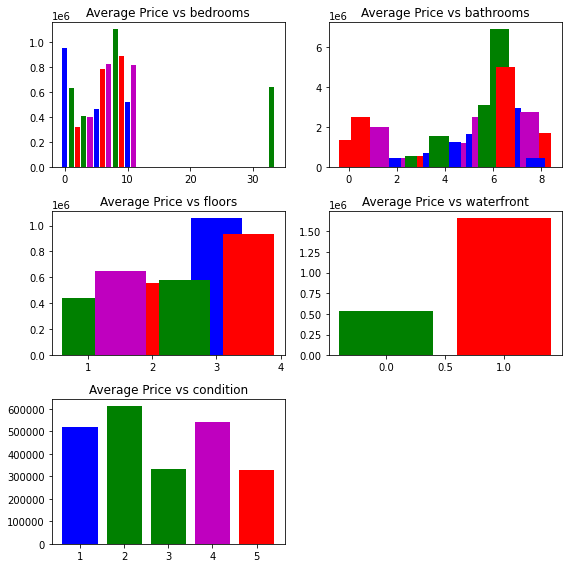

In [21]:
# Visualise the categorical features
colors = ['g', 'r', 'm', 'b']
fig = plt.figure(figsize=(8, 8))
plt.subplot(3,2,1)
plt.title('Average Price vs bedrooms')
cat_list = houses_prep['bedrooms'].unique()
cat_average = houses_prep.groupby('bedrooms').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(3,2,2)
plt.title('Average Price vs bathrooms')
cat_list = houses_prep['bathrooms'].unique()
cat_average = houses_prep.groupby('bathrooms').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(3,2,3)
plt.title('Average Price vs floors')
cat_list = houses_prep['floors'].unique()
cat_average = houses_prep.groupby('floors').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(3,2,4)
plt.title('Average Price vs waterfront')
cat_list = houses_prep['waterfront'].unique()
cat_average = houses_prep.groupby('waterfront').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()


plt.subplot(3,2,5)
plt.title('Average Price vs condition')
cat_list = houses_prep['condition'].unique()
cat_average = houses_prep.groupby('condition').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

The bar charts show that there are a variation betweens the categories of each variable with regards to the price. For example, the prices of houses with waterfront are more expensive than houses without waterfront.

In [22]:
# Check for outliers
houses_prep['price'].describe().apply("{0:.5f}".format)

count      21613.00000
mean      540088.14177
std       367127.19648
min        75000.00000
25%       321950.00000
50%       450000.00000
75%       645000.00000
max      7700000.00000
Name: price, dtype: object

It shows that 50% of the prices located from 321950 to 64500, that is far away from the max and min.

In [23]:
houses_prep['price'].quantile([0.05, 0.1, 0.15, 0.5, 0.75, 0.9, 0.95, 0.99])

0.05     210000.0
0.10     245000.0
0.15     270000.0
0.50     450000.0
0.75     645000.0
0.90     887000.0
0.95    1156480.0
0.99    1964400.0
Name: price, dtype: float64

This means that 5% of the prices are less than or equal 210000. The 0.99 is too large we might considet it as outlier and delete it.

In [24]:
# ------------------------------------------------------
# Step 4 - Check Multiple Linear Regression Assumptions
# ------------------------------------------------------
# Linearity using correlation coefficient matrix using corr
fig = plt.figure(figsize=(8, 8))
pd.options.display.max_columns = None

correlation = houses_prep[['sqft_living', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15', 'price']].corr()
print(correlation)

               sqft_living  sqft_above  yr_built       lat      long  \
sqft_living       1.000000    0.876597  0.318049  0.052529  0.240223   
sqft_above        0.876597    1.000000  0.423898 -0.000816  0.343803   
yr_built          0.318049    0.423898  1.000000 -0.148122  0.409356   
lat               0.052529   -0.000816 -0.148122  1.000000 -0.135512   
long              0.240223    0.343803  0.409356 -0.135512  1.000000   
sqft_living15     0.756420    0.731870  0.326229  0.048858  0.334605   
price             0.702035    0.605567  0.054012  0.307003  0.021626   

               sqft_living15     price  
sqft_living         0.756420  0.702035  
sqft_above          0.731870  0.605567  
yr_built            0.326229  0.054012  
lat                 0.048858  0.307003  
long                0.334605  0.021626  
sqft_living15       1.000000  0.585379  
price               0.585379  1.000000  


<Figure size 576x576 with 0 Axes>

Correlation between sqft_living and sqft_above is almost 0.8766, so we will drop sqft_above.

Correlation between sqft_living and sqft_living15 is almost 0.7564, so we will drop sqft_living15.

Correlation between price and yr_built is almost 0, so we will drop yr_built.
Correlation between price and long is almost 0, so we will drop long.

In [25]:
houses_clean = houses_prep.drop(['sqft_above', 'sqft_living15', 'long', 'yr_built'], axis=1)